## Import modules: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

## Function definitions: 

In [15]:
def essentiality_calls(df, gene_id):
# Return the columns in which a given gene is called essential:
    
    cols = df.columns[2:]
    col_list = []
    for col in cols:
        if df[df['Rv_ID']==gene_id][col].values[0] == 1:
            col_list.append(col)
            
    return col_list


def essential_subset(df, subset_cols, subset_name):
    df_temp = df[['Rv_ID', 'gene_name']+subset_cols].copy()
    df_temp[subset_name] = df_temp.sum(numeric_only=True, axis = 1)
    
    df_temp.sort_values(by=subset_name, ascending=False, inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    df_temp = df_temp[['Rv_ID', 'gene_name', subset_name] + subset_cols]
    
    return df_temp

## Files and paths: 

In [16]:
dir_data = '../../data'
dir_figs = '../../figures/Tn_mat_stats/'

Load Mtb-Tn-Mat

In [17]:
tn_file = os.path.join(dir_data, 'Tn_library_DB.xlsx')
df_tn = pd.read_excel(tn_file)

# Rank columns by the number of essential genes. 

In [18]:
df_tn.sum(numeric_only=True).sort_values(ascending = False)

2012_Zhang             742
2013_DeJesus           667
2017A_DeJesus          625
2003A_Sassetti         614
2013_Zhang_1           580
Rv0307c                554
Rv3005c                458
2015_Mendum            380
Rv1565c                363
marP                   296
Rv3916c                293
Rv1432                 201
2003B_Sassetti         193
2016_Nambi             191
2016_Korte             136
2005_Rengarajan        126
Rv2680                 124
ponA1                  120
2017_Xu_1E             110
2018_Rittershaus_1A    101
2011_Griffin_2          96
2017_Xu_1C              90
Rv3717                  90
2017B_DeJesus_1B        90
2017_Xu_1A              89
2017B_DeJesus_1C        84
2017_Xu_1B              75
2017_Mishra_1C          70
2017_Xu_1D              67
2013_Zhang_2            58
Rv0954                  52
2018_Carey_1G           48
2017_Mishra_1A          47
2017B_DeJesus_1A        46
Rv3811                  41
2018_Carey_1C           41
Rv3594                  35
2

Visualize: 

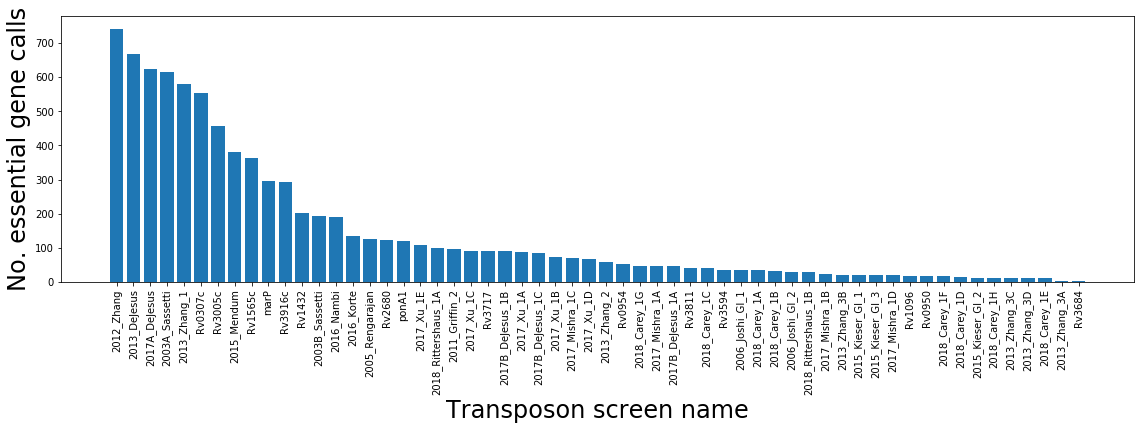

In [19]:
df_Tn_screen_stats = df_tn.sum(numeric_only=True).sort_values(ascending = False)
vals = df_Tn_screen_stats.values
labels = df_Tn_screen_stats.keys()
xvals = np.arange(len(vals))
plt.figure(figsize = (16,6))
plt.bar(xvals, vals)
plt.ylabel('No. essential gene calls', fontsize = 24)
xt = plt.xticks(xvals, np.array(labels), rotation = 90)
plt.xlabel('Transposon screen name', fontsize = 24)
plt.tight_layout()
file_out = os.path.join(dir_figs, 'Tn_screen_stats.png')
plt.savefig(file_out, dpi = 300)


# Rank genes by the number of times they're essential across conditions: 

In [20]:
df_tn['sum_all'] = df_tn.sum(numeric_only=True, axis = 1)
df_tn_top = df_tn[df_tn.sum_all > 12][['Rv_ID', 'gene_name', 'sum_all']].sort_values(by='sum_all', ascending=False)
df_tn_top.reset_index(inplace=True, drop=True)
df_tn_top

,Rv_ID,gene_name,sum_all
0,Rv2931,ppsA,22
1,Rv2935,ppsE,21
2,Rv0806c,cpsY,21
3,Rv2932,ppsB,20
4,Rv1836c,-,20
5,Rv0066c,icd2,19
6,Rv2933,ppsC,19
7,Rv1821,secA2,18
8,Rv2940c,mas,18
9,Rv2934,ppsD,17


### Distribution of essentiality counts across genes: 

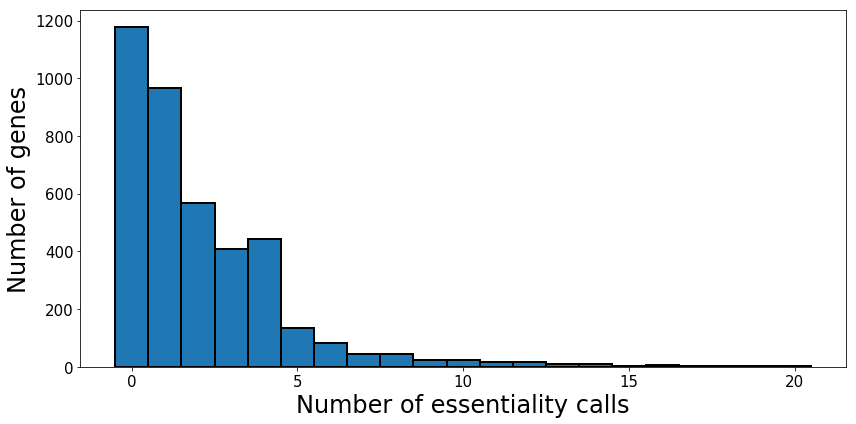

In [22]:
plt.figure(figsize = (12,6))
hist = plt.hist(df_tn['sum_all'].values, bins = np.arange(-0.5, 21), edgecolor='black', linewidth=2)

# sns.distplot(df_tn['sum_all'].values, bins = np.arange(-0.5, 21))
plt.xlabel('Number of essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.tight_layout()
out_file = os.path.join(dir_figs, 'gene_stats.png')
plt.savefig(out_file, dpi = 300)

### Cumulative distribution:

In [41]:
myrange = np.arange(df_tn['sum_all'].max())
cdf = np.zeros(len(myrange))
for n in myrange:
    cdf[n] = df_tn[df_tn.sum_all<=n].shape[0] / df_tn.shape[0]

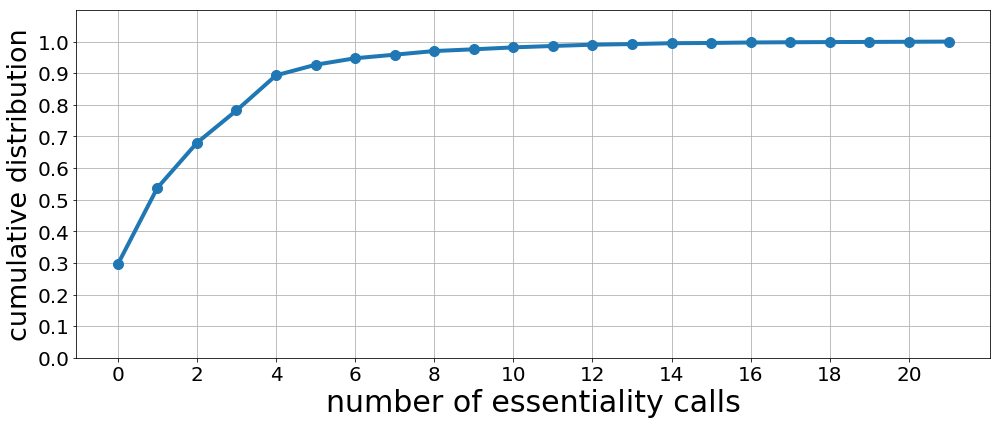

In [70]:
plt.figure(figsize = (14,6))
plt.plot(myrange, cdf, '-o', lw = 4, ms = 10)
xt = plt.xticks( np.arange(0, df_tn['sum_all'].max(), 2), fontsize = 20)
plt.ylim(0, 1.1)
yt = plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 20)
plt.xlabel('number of essentiality calls', fontsize = 30)
plt.ylabel('cumulative distribution', fontsize = 27)
plt.grid(True, xdata = myrange)
plt.tight_layout()


### Read in list of genes and output their essentiality calls:

In [23]:
gene_list_file = 'test.xlsx'
df_gene_list = pd.read_excel(os.path.join(dir_data, 'other_data', gene_list_file))
gene_list = df_gene_list.Rv_ID.values

In [26]:
df_tn[df_tn.Rv_ID.isin(gene_list)][['Rv_ID', 'sum_all']]

,Rv_ID,sum_all
0,Rv0001,4
1,Rv0002,3
2,Rv0003,4
3,Rv0004,0
4,Rv0005,4


# Start playing around with the genes in your CRISPRi library

mdh

In [168]:
gene_id = 'Rv1240'
essentiality_calls(df_tn, gene_id)

[]

### PEP-node

pckA

In [152]:
gene_id = 'Rv0211'
essentiality_calls(df_tn, gene_id)

['2012_Zhang',
 '2013_DeJesus',
 '2013_Zhang_1',
 '2013_Zhang_2',
 '2017_Xu_1E',
 '2017_Mishra_1D',
 'Rv3717',
 'Rv3916c',
 'marP',
 'Rv0954',
 'Rv0307c']

### Shikimate pathway

aroE --> look at the primary data!

Is this really interesting?  Are the other steps essential? 

In [169]:
gene_id = 'Rv2552c'
essentiality_calls(df_tn, gene_id)

['2003A_Sassetti', 'Rv0954']

### More global approach: 

In [184]:
df_cloned = pd.read_excel('cloned_genes_DB.xlsx', sheet_name='selected')
df_cloned.dropna(subset=['Rv_ID'], inplace=True)
cloned_genes = [''.join(rv.split('_')) for rv in df_cloned.Rv_ID.unique()]
len(cloned_genes)

128

In [185]:
df_tn_cloned = df_tn[df_tn.Rv_ID.isin(cloned_genes)]

In [201]:
cols_data = df_tn_cloned.columns[2:-1]

In [204]:
df_tn_cloned.sort_values(by='sum_all', ascending=False)
df_tn_cloned.reset_index(inplace=True, drop=True)
df_tn_cloned = df_tn_cloned[['Rv_ID', 'gene_name', 'sum_all']+list(cols_data)]

In [205]:
df_tn_cloned.to_excel('Tn_data_CRISPRi_cloned.xlsx', index = False)

In [206]:
df_tn_cloned.head()

,Rv_ID,gene_name,sum_all,2003A_Sassetti,2003B_Sassetti,2005_Rengarajan,2006_Joshi_GI_1,2006_Joshi_GI_2,2011_Griffin_2,2012_Zhang,...,Rv0950,Rv3717,Rv3594,Rv3916c,marP,Rv0954,Rv1432,Rv1096,Rv2680,Rv0307c
0,Rv3283,sseA,14,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,Rv1432,-,13,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,Rv0244c,fadE5,12,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,Rv0211,pckA,11,0,0,0,0,0,0,1,...,0,1,0,1,1,1,0,0,0,1
4,Rv2684,arsA,8,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


Looking at individual genes: 

In [212]:
gene_id = 'Rv0697'
essentiality_calls(df_tn, gene_id)

['2003A_Sassetti',
 '2012_Zhang',
 '2013_DeJesus',
 '2016_Nambi',
 '2017A_DeJesus',
 'Rv3916c']

Goal: I want to ask if a gene is (or which genes are) likely to be essential in vitro. 

Therefore, you need a way to pick the columns are that correspond to in vitro, glycerol experiments. 

In [234]:
in_vitro_growth_cols = ["2003A_Sassetti", "2012_Zhang", "2013_DeJesus", "2017A_DeJesus", "2018_Rittershaus_1A"]
df_tn_cloned_invitro = essential_subset(df_tn_cloned, in_vitro_growth_cols, 'essential_invitro_score')
df_tn_cloned_invitro.to_excel('Tn_invitro_CRISPRi_cloned.xlsx', index=False)

# IDEA: 
Have an "unknown function" score, that tells you how much is a gene really of unknown function. 